In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
import warnings
warnings.filterwarnings("ignore")


In [13]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score 


In [14]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [15]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
# 0: glioma tumor
# 1. menigioma tumour
# 2. no tumour
#3. pituitary tumour

for i in labels:
    folderPath = os.path.join("\\Users\\ivhp2\\Desktop\\d\\bt\\Training\\",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join("\\Users\\ivhp2\\Desktop\\d\\bt\\Testing\\",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [16]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [18]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [19]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


83/83 [==============================] - 84s 980ms/step - loss: 2.0232 - accuracy: 0.3050 - val_loss: 1.3651 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 79s 948ms/step - loss: 1.2532 - accuracy: 0.4154 - val_loss: 1.1217 - val_accuracy: 0.4966
Epoch 3/20
83/83 [==============================] - 79s 956ms/step - loss: 0.9911 - accuracy: 0.5592 - val_loss: 0.8927 - val_accuracy: 0.6020
Epoch 4/20
83/83 [==============================] - 78s 946ms/step - loss: 0.8679 - accuracy: 0.6300 - val_loss: 1.2036 - val_accuracy: 0.5204
Epoch 5/20
83/83 [==============================] - 82s 990ms/step - loss: 0.7957 - accuracy: 0.6663 - val_loss: 0.7454 - val_accuracy: 0.6905
Epoch 6/20
83/83 [==============================] - 79s 951ms/step - loss: 0.7079 - accuracy: 0.7015 - val_loss: 0.9524 - val_accuracy: 0.5782
Epoch 7/20
83/83 [==============================] - 79s 952ms/step - loss: 0.6605 - accuracy: 0.7230 - val_loss: 0.6461 - val_accuracy: 0.72

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

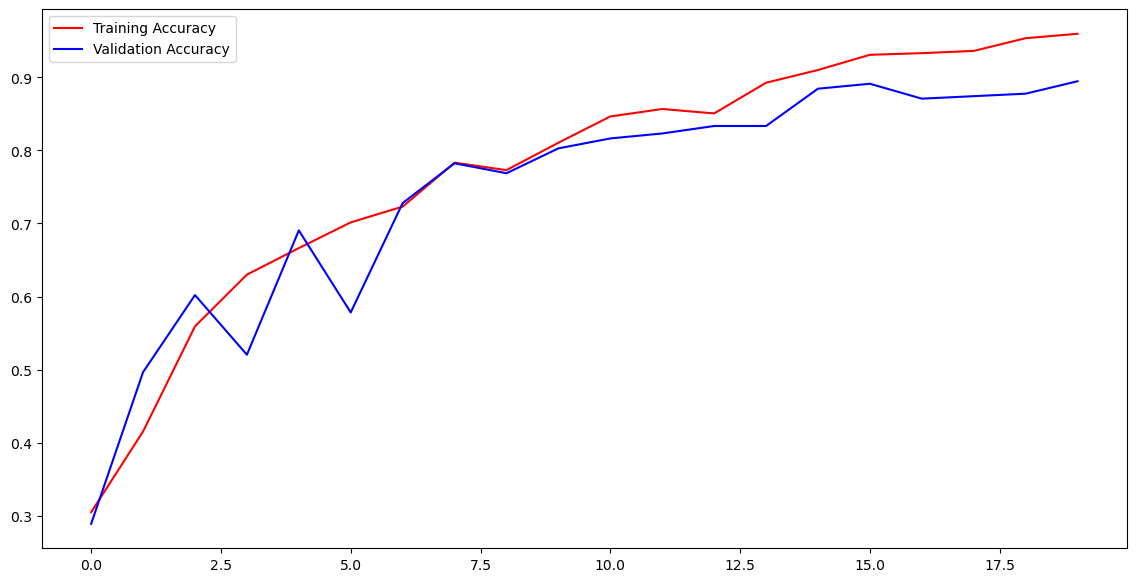

In [24]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

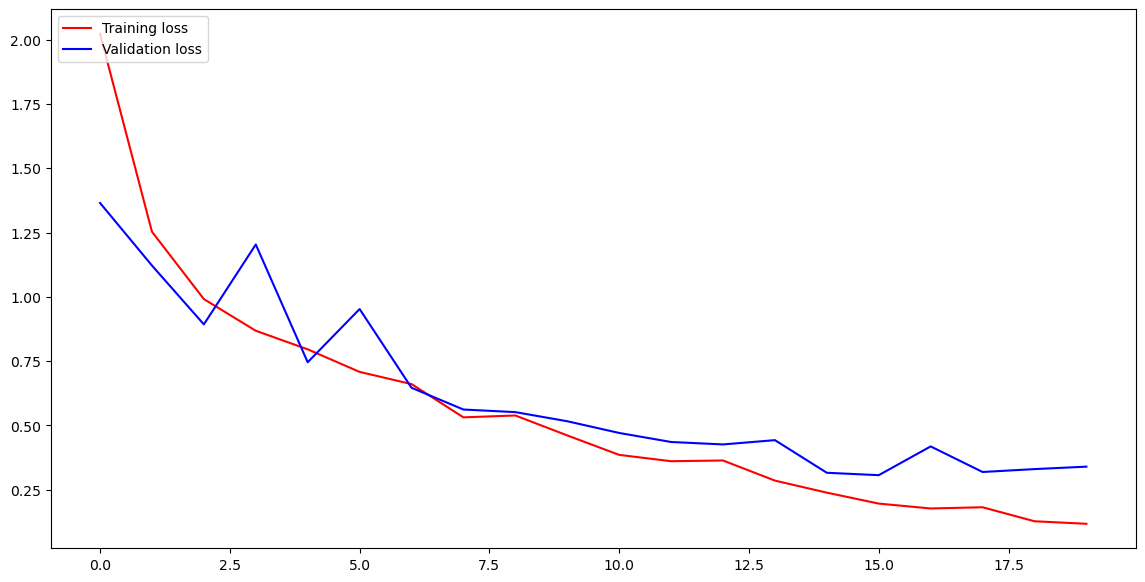

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [30]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        global uploaded_image
        uploaded_image = Image.open(file_path)
        uploaded_image.save("\\Users\\ivhp2\\Desktop\\d\\bt\\uploads\\uploaded_image.jpg")  # Save the uploaded image to a file
    root.destroy()
    
root = tk.Tk()
root.title("Image Uploader")



uploaded_image = None

# Text input field
text_frame = tk.Frame(root)
text_frame.pack(pady=10)

# Text output area
text_output = tk.Text(root, height=5, width=40)
text_output.pack()

upload_button = tk.Button(root, text="Upload Image", command=upload_image)
upload_button.pack(pady=20)


root.mainloop()


In [31]:
def readimg(path):
    img = cv2.imread(path)
    img = cv2.resize(img,(150,150))
    img_array = np.array(img)
    img_array = img_array.reshape(1,150,150,3)
    img_array.shape

    a=model.predict(img_array)
    indices = a.argmax()
    return indices

In [32]:
def check():
    if (readimg("\\Users\\ivhp2\\Desktop\\d\\bt\\uploads\\uploaded_image.jpg")==0):
        print('glioma tumour')
    elif (readimg("\\Users\\ivhp2\\Desktop\\d\\bt\\uploads\\uploaded_image.jpg")==1):
        print ('menigioma tumour')
    elif (readimg("\\Users\\ivhp2\\Desktop\\d\\bt\\uploads\\uploaded_image.jpg")==2):
        print('no tumour')
    elif (readimg("\\Users\\ivhp2\\Desktop\\d\\bt\\uploads\\uploaded_image.jpg")==3):
        print ('pituitary tumour')
check()

1/1 [==============================] - 0s 32ms/step
menigioma tumour


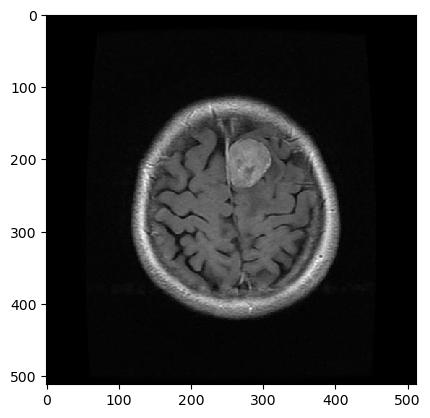

In [29]:
from tensorflow.keras.preprocessing import image
img = image.load_img('\\Users\\ivhp2\\Desktop\\d\\bt\\uploads\\uploaded_image.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()